# House Prices - Initial Variable Exploration 

Initial exploration of all variables listed in `variable_exploration.xlsx` to confirm expectations of variables that affect house prices. Only variables with medium to high affect in the excel sheet are explored. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline

pd.set_option('display.max_columns', 100)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Numerical Variables Exploration 

After reviewing the descriptions of all numerical variables, the following stood out with a medium to high effect on the target variable (sale price): 
- LotArea
- TotalBsmtSF
- 1stFlrSF (duplicate to GrLivArea)
- 2ndFlrSF (duplicate to GrLivArea)
- GrLivArea
- GarageArea
- MiscVal

In [43]:
def plot_numerical_var(var): 
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    fig = data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
    return fig

# Plotly express version
# fig = px.scatter(df_train, x=var, y="SalePrice")

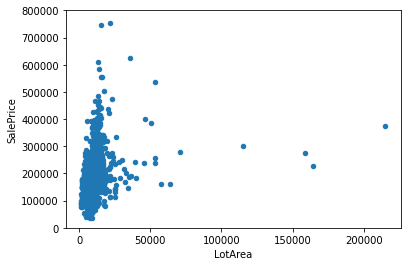

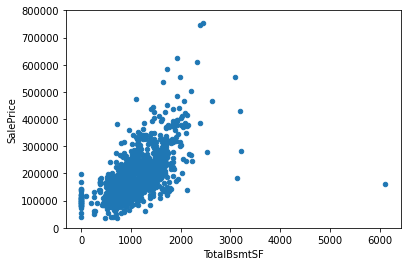

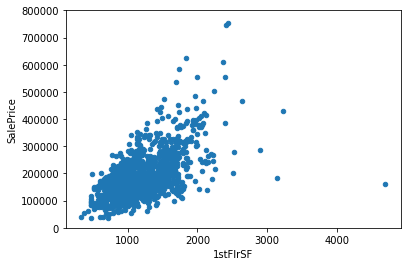

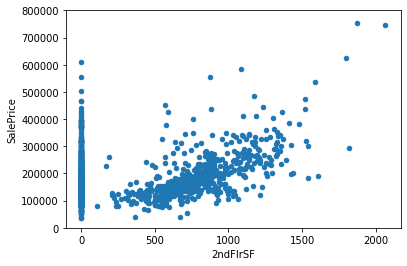

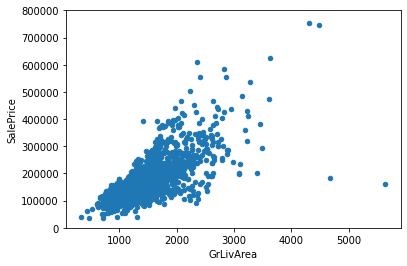

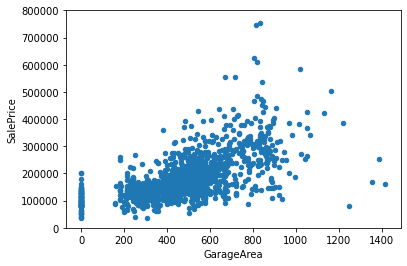

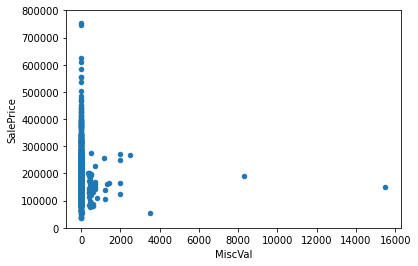

In [45]:
# Scatter plots 
numerical_vars = [
    'LotArea'
    ,'TotalBsmtSF'
    ,'1stFlrSF'
    ,'2ndFlrSF'
    ,'GrLivArea'
    ,'GarageArea'
    ,'MiscVal'
]

plots = [plot_numerical_var(var) for var in numerical_vars]

## Numerical Vars Review 
Based on the plots generated, `GrLivArea` has high impact; `TotalBsmtSF` and `GarageArea` have medium impact on sale price. 

# Categorical Variables Exploration

After reviewing the descriptions of all categorical variables, the following stood out with a medium to high effect on the target variable (sale price): 
- Neighborhood
- BldgType
- HouseStyle
- OverallQual
- OverallCond
- YearBuilt
- ExterCond
- BsmtCond
- FullBath
- BedroomAbvGr
- KitchenQual
- TotRmsAbvGrd
- GarageType

In [46]:
def plot_categorical_var(var): 
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    return fig 

# Plotly Express Version
# fig = px.box(df_train, x="OverallQual", y="SalePrice", notched=True, width=1000, height=600)
# fig.show()

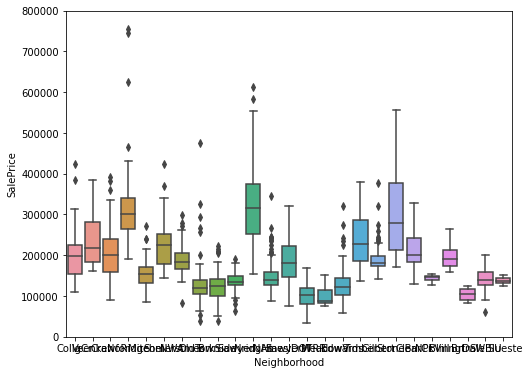

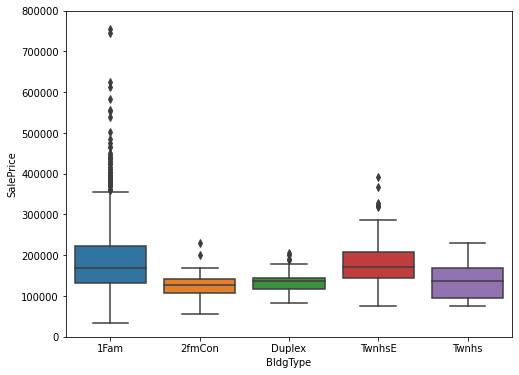

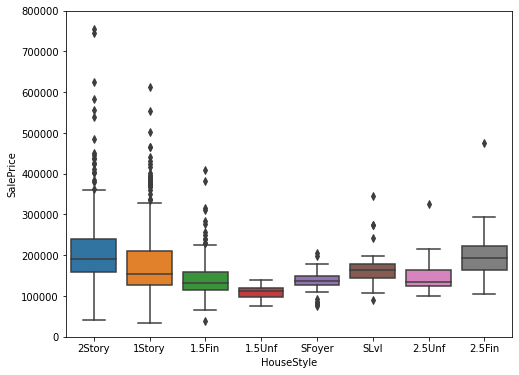

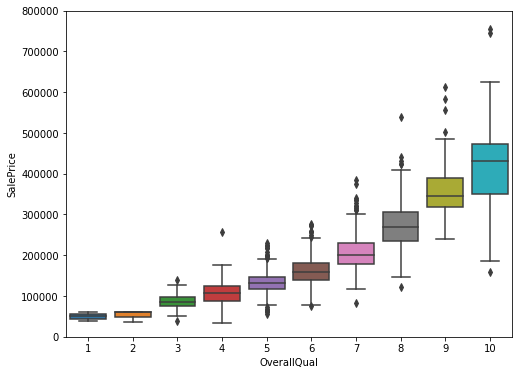

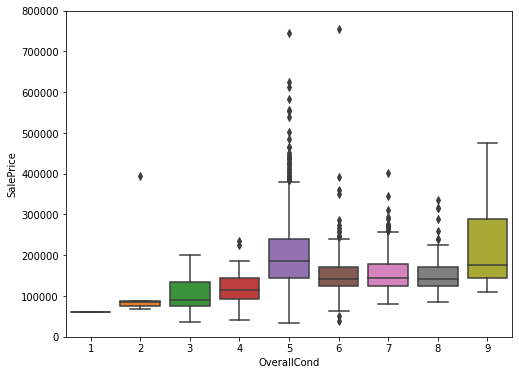

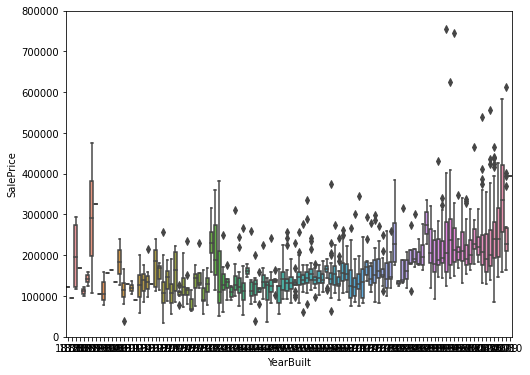

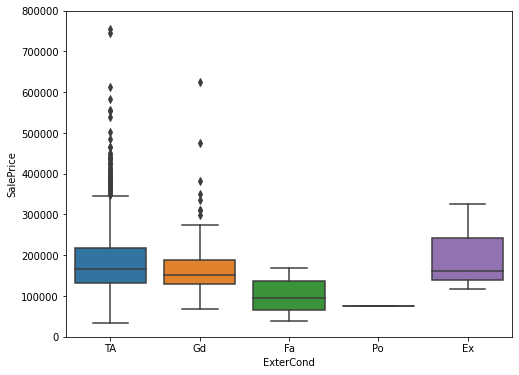

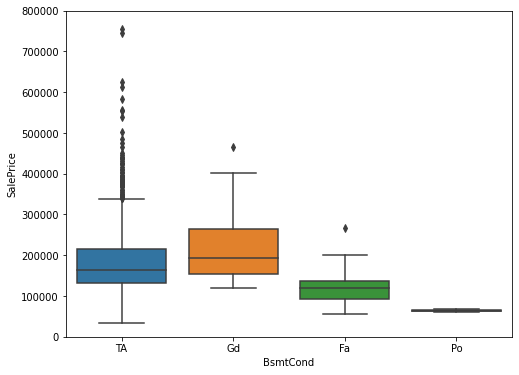

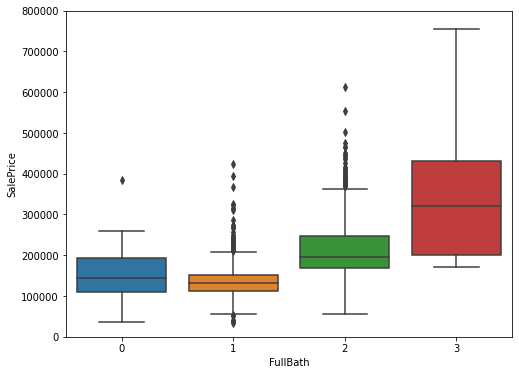

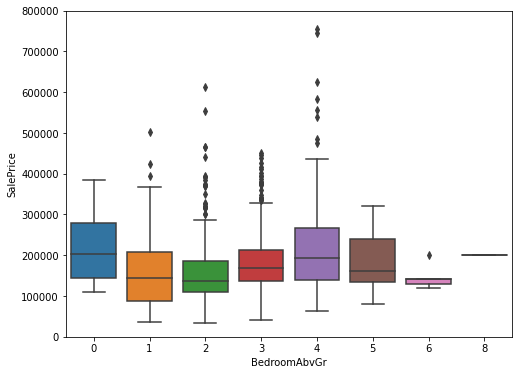

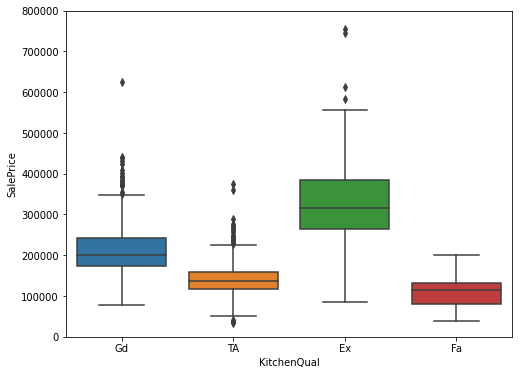

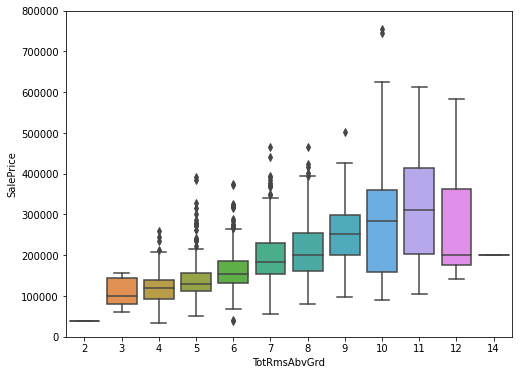

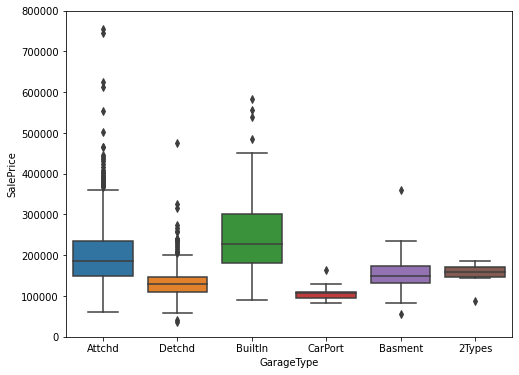

In [22]:
# Scatter plots 
cat_vars = [
    'Neighborhood'
    ,'BldgType'
    ,'HouseStyle'
    ,'OverallQual'
    ,'OverallCond'
    ,'YearBuilt'
    ,'ExterCond'
    ,'BsmtCond'
    ,'FullBath'
    ,'BedroomAbvGr'
    ,'KitchenQual'
    ,'TotRmsAbvGrd'
    ,'GarageType'
]

plots = [plot_categorical_var(var) for var in cat_vars]

## Categorical Vars Review 
Based on the plots generated, `OverallQual` has high impact; `Neighborhood`, `YearBuilt`, `KitchenQual`  and `TotRmsAbvGrd` have medium impact on sale price. 

### Test Other Numerical Variables 
The following variables were **expected** to have a low impact based on the variable description. Perform sanity check to ensure assumptions were correct. 

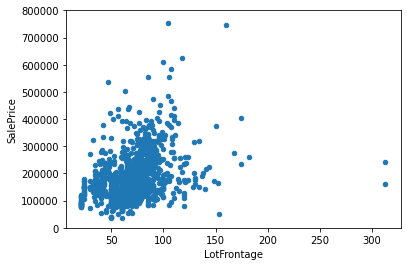

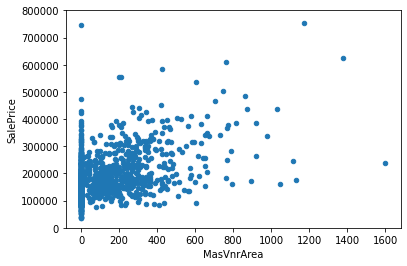

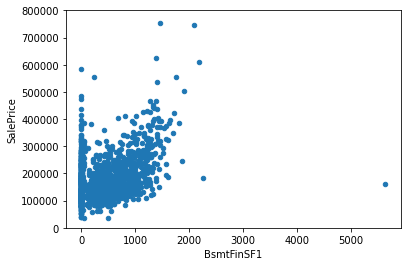

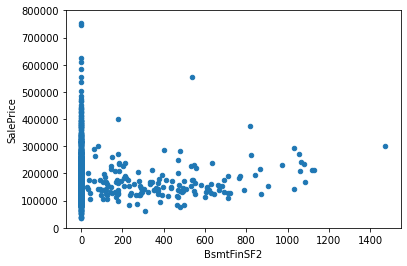

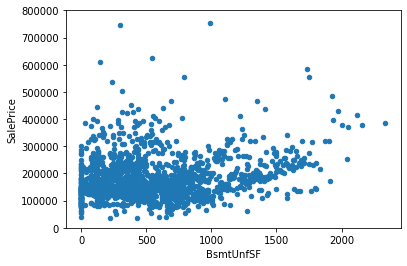

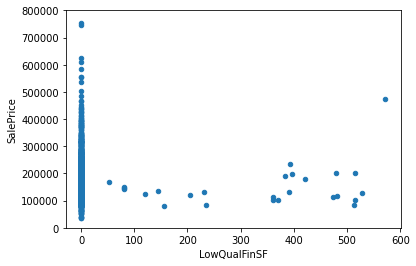

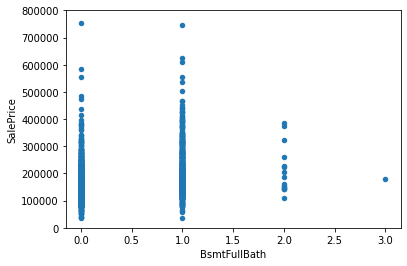

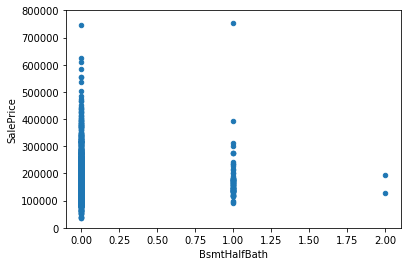

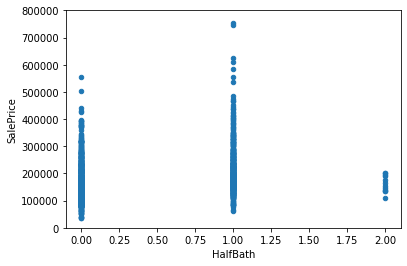

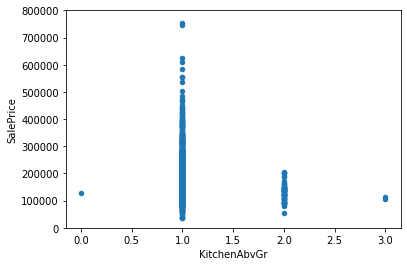

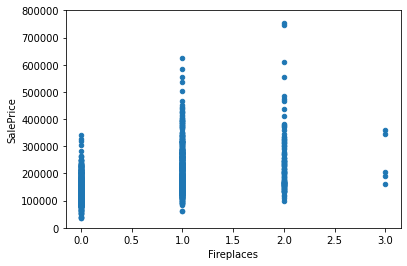

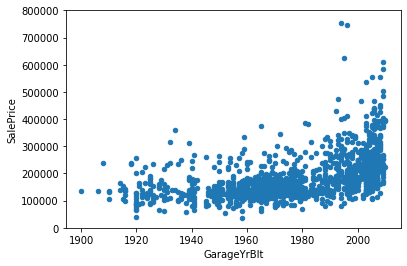

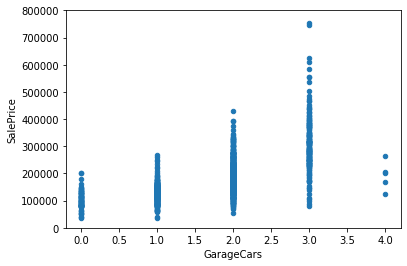

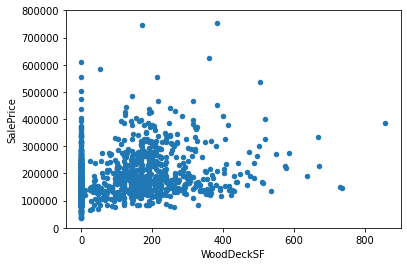

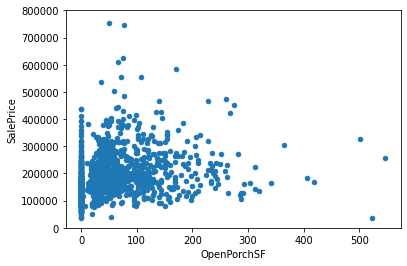

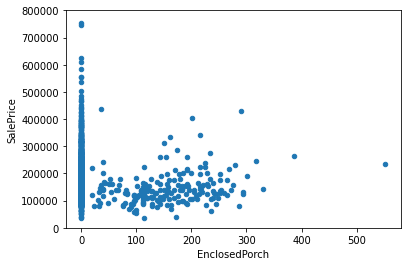

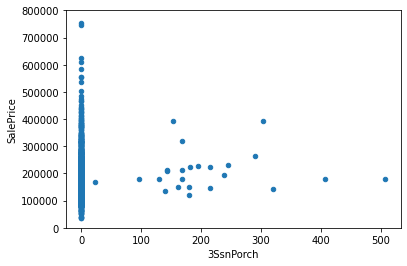

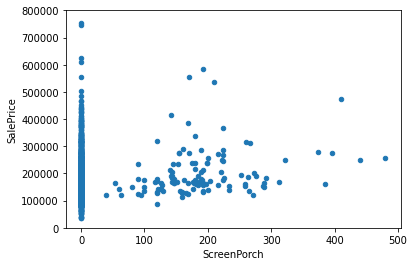

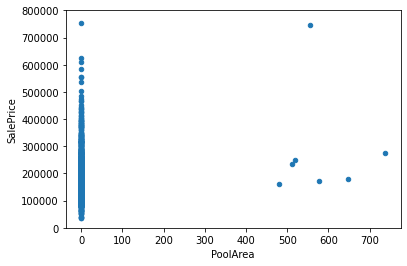

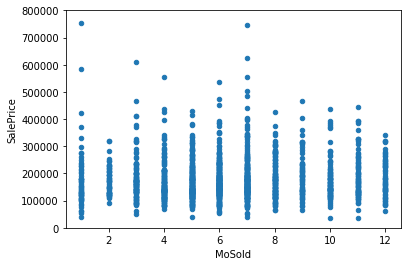

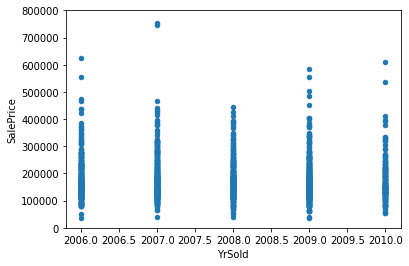

In [23]:
# Scatter plots 
numerical_vars = [
    'LotFrontage'
    ,'MasVnrArea'
    ,'BsmtFinSF1'
    ,'BsmtFinSF2'
    ,'BsmtUnfSF'
    ,'LowQualFinSF'
    ,'BsmtFullBath'
    ,'BsmtHalfBath'
    ,'HalfBath'
    ,'KitchenAbvGr'
    ,'Fireplaces'
    ,'GarageYrBlt'
    ,'GarageCars'
    ,'WoodDeckSF'
    ,'OpenPorchSF'
    ,'EnclosedPorch'
    ,'3SsnPorch'
    ,'ScreenPorch'
    ,'PoolArea'a
    ,'MoSold'
    ,'YrSold'
]

plots = [plot_numerical_var(var) for var in numerical_vars]

`LotFrontage` stands out with a medium impact with the rest being low impact on Sale Price.

## Summary

The following variables stood out in their impact on SalePrice. 

**Numerical**: 
- High: `GrLivArea`:  
- Medium: `TotalBsmtSF`, `GarageArea`, `LotFrontage`

**Categorical**: 
- High: `OverallQual`:  
- Medium: `Neighborhood`, `YearBuilt`, `KitchenQual`, `TotRmsAbvGrd`

## Next Steps 

Continue playing around with analysis done in top voted Kaggle notebook and add analysis for variables not included in the top voted notebook.